# **G345 - ANÁLISIS DE DATOS**

# **ANÁLISIS DE LA DEPRESIÓN EN ESTUDIANTES Y SUS PREDICTORES**

# **Preparar el Entorno**

In [1]:
# Se habilita el Drive para la carga de archivos
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Se importan las librerías
import numpy as np
import pandas as pd
import os

# **Cargar Datos desde un CSV**

### **Acerca de este archivo**

Este conjunto de datos contiene información completa sobre la salud mental y sus factores relacionados, de un conjunto de estudiantes de diferentes niveles académicos en varias ciudades de la India. Está diseñado para analizar **las tendencias y los predictores de la depresión** en estudiantes.

Los datos incluyen información demográfica, presiones académicas y laborales, hábitos de vida e indicadores específicos de salud mental.

Los investigadores pueden utilizar este conjunto de datos para identificar factores de riesgo de depresión y desarrollar estrategias de intervención temprana, garantizando al mismo tiempo el manejo ético de información confidencial.

### **Esquema del CSV: Diccionario de Datos**



**Id:**
Un identificador único asignado a cada registro de estudiante en el conjunto de datos.

**Género:**
El género del estudiante (p. ej., masculino, femenino, otro). Esto ayuda a analizar las tendencias específicas de género en salud mental.

**Edad:**
La edad del estudiante en años.

**Ciudad:**
La ciudad o región donde reside el estudiante, que proporciona el contexto geográfico para el análisis.

**Presión Académica:**
Una medida que indica el nivel de presión que enfrenta el estudiante en el ámbito académico. Esto podría incluir el estrés por exámenes, tareas y expectativas académicas generales.

**Presión Laboral:**
Una medida de la presión relacionada con el trabajo o las responsabilidades laborales, relevante para estudiantes que trabajan mientras estudian.

**Promedio de Calificaciones Acumulativo:**
El promedio de calificaciones acumulativo del estudiante, que refleja su rendimiento académico general.

**Satisfacción con los Estudios:**
Un indicador de la satisfacción del estudiante con sus estudios, que puede correlacionarse con el bienestar mental.

**Satisfacción Laboral:**
Una medida de la satisfacción del estudiante con su trabajo o entorno laboral, si corresponde.

**Duración del Sueño:**
El promedio de horas que el estudiante duerme al día, un factor importante para la salud mental.

**Hábitos Alimenticios:**
Una evaluación de los patrones de alimentación y los hábitos nutricionales del estudiante, que pueden afectar su salud general y estado de ánimo.

**Título:**
El título o programa académico que cursa el estudiante.

**¿Ha tenido alguna vez pensamientos suicidas?:**
Un indicador binario (Sí/No) que refleja si el estudiante alguna vez ha experimentado ideación suicida.

**Horas de trabajo/Estudio:**
El promedio de horas diarias que el estudiante dedica al trabajo o al estudio, lo cual puede influir en sus niveles de estrés.

**Estrés Financiero:**
Una medida del estrés experimentado debido a preocupaciones financieras, que puede afectar la salud mental.

**Antecedentes Familiares de Enfermedades Mentales:**
Indica si existen antecedentes familiares de enfermedades mentales (Sí/No), lo cual puede ser un factor significativo en la predisposición a la salud mental.

**Depresión:**
La variable objetivo que indica si el estudiante experimenta depresión (Sí/No). Este es el enfoque principal del análisis.


### **Archivo CSV**

In [ ]:
# Lectura del archivo .csv

ruta_csv = ''

try:
  df = pd.read_csv(ruta_csv)
except OSError as err:
  print(f"No se pudo abrir el archivo. Error: {err}.")
else:
  print(f"Archivo cargado con éxito en el dataframe.")

# **Limpieza y Preparación de Datos**

La limpieza y preparación o transformación de los datos es fundamental para garantizar la realización de un buen análisis que nos de resultados confiables.

En esta etapa se solucionan todas las inconsistencias encontradas en el dataset, y transformamos los datos para facilitar su análisis posterior.

## **0. Explorar Características del Dataframe**

Una vez cargados los datos, exploraremos el DataFrame para entender su estructura y contenido.

In [ ]:
# Mostrar las dimensiones del dataFrame
df.shape

In [ ]:
# Mostrar las primeras filas del dataFrame
df.head()

In [ ]:
# Mostrar las últimas filas del dataFrame
df.tail()

In [ ]:
# Mostrar información general del dataFrame
df.info()

In [ ]:
# Mostrar los nombres de las columnas del dataframe
df.columns

In [ ]:
# Mostrar los índices del dataframe
df.index

In [ ]:
# Mostrar el tipo de datos de cada columna del dataframe
df.dtypes

In [ ]:
# Mostrar cuántos valores diferentes toma cada variable y cuáles son, cuando son menos de 20.

for var in df.columns:
  if df[var].nunique() < 20:
    print(f"{var}[n = {df[var].nunique()}]: {df[var].unique()}")
  else:
    print(f"{var}[n = {df[var].nunique()}]")

In [ ]:
# Mostrar el número de datos nulos o vacíos de cada columna del dataframe
df.isnull().sum()

In [ ]:
# Mostrar el número de datos NaN de cada columna del dataframe
df.isna().sum()

In [ ]:
# Mostrar registros duplicados en el dataframe
df.duplicated().sum()

In [ ]:
df.duplicated(subset=['Id']).sum()

### **CONCLUSIONES:**

De lo anterior se puede observar que:

*  Una variable que debería ser entera `int64` es decimal `float64` (*Estrés Financiero*).
*  Hay varias variables de tipo objeto `object` que son datos categóricos expresados de manera cualitativa (*Género, Ciudad, Duración del Sueño, Hábitos Alimenticios, Título, Pensamientos Suicidas?, Antecedentes Familiares de Enfermedades Mentales*).
*  La variable *Id* no tiene ninguna ingerencia sobre los datos.
*  Las variables categóricas cuantitativas inician en 0, excepto *Estrés Financiero*.
*  La variable *Duración del Sueño* tiene dos valores que no corresponden a las categorías que contiene: 99.00 y 3.00
*  La variable *Pensamientos Suicidas?* debería tener sólo 2 tipos de valores, pero tiene 4, 2 de los cuales significan lo mismo de los otros 2 correspondientemente, pero unos son cualitativos y los otros cuantitativos (`No -> 0, Si -> 1`).
*  Hay dos variables que tienen valores nulos: *Ciudad* y *Estrés Financiero*.
*  No hay registros (filas) duplicados.


## **1. Eliminar Columnas Innecesarias**

In [ ]:
# Eliminar las columnas innecesarias

df.drop(columns=['Id'], inplace=True)

In [ ]:
# Verificar como queda el dataframe
df.head()

## **2. Manejar Datos Faltantes (NaN, NaT, null)**

### **Asignar un Valor Fijo**

Se reemplazan los datos faltantes con un valor específico. Esto se puede realizar por columna o en todo el dataframe.

In [ ]:
# Verificar la cantidad de datos faltantes en la columna
df['Ciudad'].isnull().sum()

In [ ]:
# Asignar el valor deseado
df['Ciudad'].fillna('Delhi', inplace=True)

# Verificar la nueva cantidad de datos faltantes
df['Ciudad'].isnull().sum()

In [ ]:
# Validar la nueva cantidad de datos faltantes en todo el dataframe
df.isnull().sum()

### **Eliminar Filas con Datos Faltantes**

Si la cantidad de datos faltantes es pequeña, se puede optar por eliminar las filas con datos faltantes.

In [ ]:
# Verificar la cantidad de datos faltantes en la columna
df['Estrés Financiero'].isnull().sum()

In [ ]:
# Verificar la cantidad de registros del dataframe
print(f"Dataframe Antes: {df.shape}")

In [ ]:
# Eliminar filas con datos faltantes
df.dropna(inplace=True)

# Verificar la nueva cantidad de registros del dataframe
print(f"Dataframe Después: {df.shape}")

In [ ]:
# Verificar la nueva cantidad de datos faltantes en la columna
df['Estrés Financiero'].isnull().sum()

### **Eliminar Columnas con Datos Faltantes**

Si una columna tiene demasiados datos faltantes, puede ser útil eliminarla.

In [ ]:
# Eliminar todas las columnas con datos faltantes

# df.dropna(axis=1, inplace=True)

In [ ]:
# Eliminar una columna con datos faltantes en específico

# df.drop(columns=['nombre_variable'], inplace=True)

In [ ]:
# Eliminar una columna con datos faltantes en específico, cuando no se conoce la columna

# Col_Datos_Faltantes = list(df.columns[df.isna().any()])         # Lista las columnas con faltantes
# df.drop(columns=[Col_Datos_Faltantes[pos]], inplace=True)       # Elimina la columna con posición pos en la lista anterior

In [ ]:
# Verificar como queda el dataframe
# df.head()

### **Asignar un Valor según la Media, Mediana o Moda**

Se pueden reemplazar los datos faltantes con la media, mediana o moda de la columna específica a la que pertenecen los datos faltantes.

In [ ]:
# Asignar valor con la media
# df.fillna(df.mean(), inplace=True)

# Asignar valor con la mediana
# df.fillna(df.median(), inplace=True)

# Asignar valor con la moda (para datos categóricos)
# df.fillna(df.mode().iloc[0], inplace=True)

In [ ]:
# Verificar datos faltantes después de la asignación
# df.isnull().sum()

### **Asignar un Valor según Interpolaciones**

Se pueden reemplazar los datos faltantes utilizando interpolaciones, es decir, estimando los valores basándose en el conjunto de los datos conocidos para la variable en análisis, o en algunos casos, en los demás datos de un registro (columnas).

Esto se logra mediante el método **interpolate()**, que en pandas se utiliza para rellenar valores faltantes (NaN) mediante interpolación.

El método se describe así:

```
DataFrame.interpolate(
    method='linear',  # Método de interpolación: 'linear',    
                      #'time', 'polynomial', 'spline','nearest'
    axis=0,           # 0: filas, 1: columnas
    limit=None,       # Número máximo de NaN consecutivos a   
                      # rellenar
    inplace=False,    # Si modifica el DataFrame original
    limit_direction='forward'  # Dirección de relleno:
                               # 'forward', 'backward', 'both'
)
```

1. 'linear' (Por defecto):
* Funcionamiento: Interpolación lineal entre puntos conocidos.
* Usos: Datos numéricos con tendencia lineal.

2. 'time'
* Funcionamiento: Considera el índice como timestamps y ajusta la interpolación según los intervalos de tiempo
* Usos: Series temporales con intervalos irregulares

3. 'polynomial'
* Funcionamiento: Ajusta un polinomio de grado especificado (order): 1:Lineal, 2:Cuadrático, 3: Cúbico
* Usos: Datos con comportamiento no lineal
* Parámetro adicional: order (grado del polinomio)

>```
>interpolate(method='polynomial', order=2) # Cuadrática
>```



4. 'spline'
* Funcionamiento: Usa splines de suavizado, es decir, es una curva que pasa "cerca" de los puntos de datos en lugar de pasar exactamente por ellos, buscando un equilibrio entre ajuste a los datos y suavidad de la curva.
* Parámetro adicional: order (grado del polinomio que suavizará)
* Usos: Datos que requieren suavizado

5. 'nearest'
* Funcionamiento: Toma el valor más cercano no nulo
* Usos: Datos categóricos o discretos, o donde se quiere preservar valores existentes

¿Cuándo usar interpolate()?
- Datos secuenciales (ej.: series temporales con fechas).
- Cuando los NaN tienen una relación matemática con los datos adyacentes.
- Alternativa a fillna() si los valores no son constantes.

¿Cuándo evitar interpolate()?
- Si los NaN son aleatorios o no tienen patrones.
- En datos categóricos no numéricos.

## **3. Manejo de Valores Erróneos**

Buscar un patrón que permita asignar un valor acorde, de lo contrario,
si la variable es categórica, podría realizarse una asignación por moda, sin embargo, si son pocos los registros y pueden ser eliminados sin afectar los resultados del análisis, es preferible eliminarlos que reemplazarlos con valores que puedan alterar el resultado.

Si la variable es numérica podría realizarse asignación según media o mediana, o eliminarlos de acuerdo con el planteamiento anterior.

In [ ]:
# Determinar el dominio de valores de la variable e identificar los datos erróneos
df['Duración del Sueño'].unique()

In [ ]:
# Encontrar los valores erróneos en el df
filtro = df['Duración del Sueño'].str.contains('99.00')
print(f"Cantidad de registros erróneos: {df['Duración del Sueño'][filtro].count()}")
print(f"Dimensión: {df.shape}")

# Muestra los registros correspondientes a los datos erróneos.
# Esto es útil para determinar si hay un patrón común que permita inferir un valor probable de reemplazo.
df[filtro]

In [ ]:
filtro = df['Duración del Sueño'].str.contains('3.00')
print(f"Cantidad de registros erróneos: {df['Duración del Sueño'][filtro].count()}")
df[filtro]

In [ ]:
# No hay patrón y son pocos los datos erróneos (0.06%), por lo que se eliminarán
df['Duración del Sueño'] = df['Duración del Sueño'].replace('99.00', np.nan)
df['Duración del Sueño'].unique()

In [ ]:
df['Duración del Sueño'] = df['Duración del Sueño'].replace('3.00', np.nan)
df['Duración del Sueño'].unique()

In [ ]:
# Verificar la nueva cantidad de registros del dataframe
print(f"Dataframe Después: {df.shape}")

In [ ]:
# Eliminar filas con datos faltantes
df.dropna(subset=['Duración del Sueño'], inplace=True)

# Verificar la nueva cantidad de registros del dataframe
print(f"Dataframe Después: {df.shape}")

In [ ]:
df['Duración del Sueño'].unique()

## **4. Reemplazo de Valores**

Cuando se tienen varios valores diferentes que representan lo mismo, es necesario dejarlos todos en los mismos términos.

De igual manera se debe garantizar que el uso de minúsculas, mayúsculas, tildes, espacios y demás características de las palabras, sean iguales en los valores que representan lo mismo (ej. viena -> Viena, No -> 0)

In [ ]:
# Determinar el dominio de valores de la variable e identificar los datos que deben ser reemplazados
df['Pensamientos Suicidas?'].unique()

In [ ]:
df['Pensamientos Suicidas?'] = df['Pensamientos Suicidas?'].replace('0', 'No')
df['Pensamientos Suicidas?'] = df['Pensamientos Suicidas?'].replace('1', 'Si')
df['Pensamientos Suicidas?'].unique()

In [ ]:
# Cambiar el rango de valores para que sea consistentes con los de otras variables.
# En este caso todas comienzan en 0 y este en 1
df['Estrés Financiero'].unique()

In [ ]:
df['Estrés Financiero'] = df['Estrés Financiero'].replace(1, 0)
df['Estrés Financiero'] = df['Estrés Financiero'].replace(2, 1)
df['Estrés Financiero'] = df['Estrés Financiero'].replace(3, 2)
df['Estrés Financiero'] = df['Estrés Financiero'].replace(4, 3)
df['Estrés Financiero'] = df['Estrés Financiero'].replace(5, 4)
df['Estrés Financiero'].unique()

## **5. Modificar Cadenas Extrayendo Caracteres**

### **Conservar dígitos y puntos:**

`.str.replace(r'[^\d.]', '', regex=True)`  

**.str:** Permite acceder a métodos de manipulación de strings en una serie de Pandas. Convierte cada elemento de la columna en un objeto string

**.replace():** Método para reemplazar patrones en strings

**r'[^\d,]':** (patrón regex) r antes de la cadena indica "raw string" (para evitar problemas con caracteres especiales)

**[ ]:** define una clase de caracteres

**^:** dentro de [ ] significa "NO estos caracteres" (negación)

**\d:** representa cualquier dígito (0-9)

**,:** es la coma literal

En conjunto: **[^\d,]** significa "cualquier carácter que NO sea un dígito ni una coma"

**'':** (reemplazo) Cadena vacía: los caracteres que coincidan serán eliminados (reemplazados por nada)

**regex=True:** Indica que el patrón es una expresión regular (regex). Permite usar sintaxis de regex avanzada. Si fuera False, buscaría coincidencias literales.


### **Eliminar solo dígitos (conservar todo lo demás):**

`.str.replace(r'\d+', '', regex=True)`


### **Conservar solo letras (eliminar números y símbolos)**

`.str.replace(r'[^a-zA-Z]', '', regex=True)`


### **Conservar letras y símbolos específicos (ej: @, -, _)**

`.str.replace(r'[^a-zA-Z@\-_]', '', regex=True)`


### **Conservar solo caracteres no alfanuméricos (puros símbolos)**

`.str.replace(r'[\w]', '', regex=True)`

**\w** equivale a **[a-zA-Z0-9_]** (todas las letras, números y guión bajo)

In [ ]:
data = {'texto': ['A1b2C3!', 'X$Y5Z_', '123-456', 'H@lloW0rld!', 'P@ssw0rd']}
df_ej = pd.DataFrame(data)

# Eliminar solo dígitos
df_ej['sin_digitos'] = df_ej['texto'].str.replace(r'\d+', '', regex=True)

# Conservar solo letras
df_ej['solo_letras'] = df_ej['texto'].str.replace(r'[^a-zA-Z]', '', regex=True)

# Conservar letras y algunos símbolos (@-)
df_ej['letras_y_simbolos'] = df_ej['texto'].str.replace(r'[^a-zA-Z@\-]', '', regex=True)

# Conservar solo símbolos (no letras ni números)
df_ej['solo_simbolos'] = df_ej['texto'].str.replace(r'[\w]', '', regex=True)

df_ej

### **Eliminar $, espacios y comas, dejando solo números:**

In [ ]:
# Datos de ejemplo
data = {'precio': ['$    12,3', '$    5,6', '$    8,90']}
df_ej = pd.DataFrame(data)


df_ej['precio_limpio'] = df_ej['precio'].str.replace(r'[^\d,]', '', regex=True)

df_ej

Otra manera menos automática:

In [ ]:
df_ej['precio_limpio'] = (df_ej['precio']
                       .str.replace('$', '')
                       .str.replace(' ', ''))
df_ej

### **Conservar solo letras, incluyendo vocales con tilde:**

In [ ]:
data = {'texto': ['Hola', 'Adiós', 'Canción', 'inglés', 'Francés']}
df_ej = pd.DataFrame(data)

df_ej['solo_letras_con_tilde'] = df_ej['texto'].str.replace(r'[^a-zA-ZáéíóúÁÉÍÓÚ]', '', regex=True)

df_ej



---



---



## **6. Eliminar Duplicados**

In [ ]:
# Elimina registros duplicados de todo el df, sólo si todas las columnas del DataFrame son idénticas en esas filas
# df.drop_duplicates(inplace=True)

In [ ]:
# Si se quiere considerar sólo cierta columna para eliminar duplicados, se usan los parámetros subset y keep
# df.drop_duplicates(subset=['nombre_var'], keep='first', inplace=True)   # Keep: 'first', 'last', False

In [ ]:
# También se puede revisar la combinación de varias columnas con filas duplicadas
# df.drop_duplicates(subset=['nombre_var1', 'nombre_var2'], keep='first', inplace=True)

## **7. Cambiar Tipos de Variables**

In [ ]:
df['Estrés Financiero'] = df['Estrés Financiero'].astype('int')
df['Estrés Financiero'].dtype

In [ ]:
df.head()

## **8. Codificar Variables Categóricas en Numéricas**

Para poder realizar análisis completos con todas las variables, es necesario que las variables categóricas sean convertidas en variables numéricas, sin embargo, no es recomendable reemplazar la variable actual sino que se aconseja crear una nueva variable con los valores numéricos asignados a las categorías de la variable original.

(Género, Ciudad, Duración del Sueño, Hábitos Alimenticios, Título, Pensamientos Suicidas?, Antecedentes Familiares de Enfermedades Mentales).

In [ ]:
# Verificar los valores actuales de las columnas
df.head()

In [ ]:
# Crear las nuevas columnas numéricas a partir de las categóricas

In [ ]:
# Se puede realizar de la siguiente manera, pero se asignan los códigos en el orden que pandas defina
# df['var_categorica'] = df['var_categorica'].astype('category').cat.codes

In [ ]:
# Para crear los códigos en un orden determinado se debe realizar de la siguiente manera

# Definir el orden deseado
categorias_ordenadas = ['Masculino', 'Femenino']

# Crear la serie categórica ordenada
serie_categorica = pd.Categorical(df['Género'], categories=categorias_ordenadas, ordered=True)

# Obtener los códigos numéricos
df['GEN'] = serie_categorica.codes

# Verificar el mapeo y los resultados
print("Mapeo de categorías a códigos:")
for codigo, categoria in enumerate(serie_categorica.categories):
    print(f"{categoria} → {codigo}")

serie_categorica

In [ ]:
df.head()

In [ ]:
categorias_ordenadas = ['Visakhapatnam', 'Bangalore', 'Srinagar', 'Varanasi', 'Jaipur', 'Pune', 'Thane',
 'Chennai', 'Nagpur', 'Nashik', 'Vadodara', 'Kalyan', 'Rajkot', 'Ahmedabad',
 'Kolkata', 'Mumbai', 'Lucknow', 'Indore', 'Surat', 'Ludhiana', 'Bhopal',
 'Meerut', 'Agra', 'Ghaziabad', 'Hyderabad', 'Vasai-Virar', 'Kanpur', 'Patna',
 'Faridabad', 'Delhi', 'Saanvi', 'Bhavna', 'Mira', 'Harsha', 'Vaanya',
 'Gaurav', 'Harsh', 'Reyansh', 'Kibara', 'Rashi', 'Nalyan', 'Mihir', 'Nalini',
 'Nandini', 'Khaziabad']

# Crear la serie categórica ordenada
serie_categorica = pd.Categorical(df['Ciudad'], categories=categorias_ordenadas, ordered=True)

# Obtener los códigos numéricos
df['CIU'] = serie_categorica.codes

# Verificar el mapeo y los resultados
print("Mapeo de categorías a códigos:")
for codigo, categoria in enumerate(serie_categorica.categories):
    print(f"{categoria} → {codigo}")

In [ ]:
categorias_ordenadas = ['Menos de 5 horas', '5-6 horas', '7-8 horas', 'Más de 8 horas']

# Crear la serie categórica ordenada
serie_categorica = pd.Categorical(df['Duración del Sueño'], categories=categorias_ordenadas, ordered=True)

# Obtener los códigos numéricos
df['DS'] = serie_categorica.codes

# Verificar el mapeo y los resultados
print("Mapeo de categorías a códigos:")
for codigo, categoria in enumerate(serie_categorica.categories):
    print(f"{categoria} → {codigo}")

In [ ]:
categorias_ordenadas = ['No Saludable', 'Moderado', 'Saludable', 'Otros']

# Crear la serie categórica ordenada
serie_categorica = pd.Categorical(df['Hábitos Alimenticios'], categories=categorias_ordenadas, ordered=True)

# Obtener los códigos numéricos
df['HA'] = serie_categorica.codes

# Verificar el mapeo y los resultados
print("Mapeo de categorías a códigos:")
for codigo, categoria in enumerate(serie_categorica.categories):
    print(f"{categoria} → {codigo}")

In [ ]:
categorias_ordenadas = ['Licenciatura en Farmacia', 'Licenciatura en Ciencias',
 'Licenciatura en Artes/Humanidades',
 'Licenciatura en Aplicaciones Informáticas', 'Maestría en Tecnología',
 'Doctorado', '12º Grado Educación Secundaria', 'Licenciatura en Educación',
 'Licenciatura en Derecho', 'Maestría en Educación', 'Maestría en Ciencias',
 'Licenciatura en Gestión Hotelera', 'Maestría en Farmacia',
 'Maestría en Aplicaciones Informáticas', 'Maestría en Artes/Humanidades',
 'Licenciatura en Comercio', 'Doctor en Medicina',
 'Maestría en Administración de Empresas', 'Licenciatura en Ingeniería',
 'Maestría en Medicina y Cirugía', 'Maestría en Comercio',
 'Licenciatura en Arquitectura', 'Maestría en Derecho',
 'Licenciatura en Tecnología', 'Licenciatura en Administración de Empresas',
 'Maestría en Ingeniería', 'Licenciatura en Medicina y Cirugía',
 'Maestría en Gestión Hotelera', 'Otros']

# Crear la serie categórica ordenada
serie_categorica = pd.Categorical(df['Título'], categories=categorias_ordenadas, ordered=True)

# Obtener los códigos numéricos
df['TIT'] = serie_categorica.codes

# Verificar el mapeo y los resultados
print("Mapeo de categorías a códigos:")
for codigo, categoria in enumerate(serie_categorica.categories):
    print(f"{categoria} → {codigo}")

In [ ]:
categorias_ordenadas = ['No', 'Si']

# Crear la serie categórica ordenada
serie_categorica = pd.Categorical(df['Pensamientos Suicidas?'], categories=categorias_ordenadas, ordered=True)

# Obtener los códigos numéricos
df['PS'] = serie_categorica.codes

# Verificar el mapeo y los resultados
print("Mapeo de categorías a códigos:")
for codigo, categoria in enumerate(serie_categorica.categories):
    print(f"{categoria} → {codigo}")

In [ ]:
categorias_ordenadas = ['No', 'Si']

# Crear la serie categórica ordenada
serie_categorica = pd.Categorical(df['Antecedentes Familiares de Enfermedades Mentales'], categories=categorias_ordenadas, ordered=True)

# Obtener los códigos numéricos
df['AFEM'] = serie_categorica.codes

# Verificar el mapeo y los resultados
print("Mapeo de categorías a códigos:")
for codigo, categoria in enumerate(serie_categorica.categories):
    print(f"{categoria} → {codigo}")

In [ ]:
# Verificar los nuevos valores de la columna
df.head()

In [ ]:
# Validar valores asignados a categorías

print(f"{'Género'}[n = {df['Género'].nunique()}]: {df['Género'].unique()}")
print(f"{'GEN'}[n = {df['GEN'].nunique()}]: {df['GEN'].unique()}")

print(f"{'Ciudad'}[n = {df['Ciudad'].nunique()}]: {df['Ciudad'].unique()}")
print(f"{'CIU'}[n = {df['CIU'].nunique()}]: {df['CIU'].unique()}")

print(f"{'Duración del Sueño'}[n = {df['Duración del Sueño'].nunique()}]: {df['Duración del Sueño'].unique()}")
print(f"{'DS'}[n = {df['DS'].nunique()}]: {df['DS'].unique()}")

print(f"{'Hábitos Alimenticios'}[n = {df['Hábitos Alimenticios'].nunique()}]: {df['Hábitos Alimenticios'].unique()}")
print(f"{'HA'}[n = {df['HA'].nunique()}]: {df['HA'].unique()}")

print(f"{'Título'}[n = {df['Título'].nunique()}]: {df['Título'].unique()}")
print(f"{'TIT'}[n = {df['TIT'].nunique()}]: {df['TIT'].unique()}")

print(f"{'Pensamientos Suicidas?'}[n = {df['Pensamientos Suicidas?'].nunique()}]: {df['Pensamientos Suicidas?'].unique()}")
print(f"{'PS'}[n = {df['PS'].nunique()}]: {df['PS'].unique()}")

print(f"{'Antecedentes Familiares de Enfermedades Mentales'}[n = {df['Antecedentes Familiares de Enfermedades Mentales'].nunique()}]: {df['Antecedentes Familiares de Enfermedades Mentales'].unique()}")
print(f"{'AFEM'}[n = {df['AFEM'].nunique()}]: {df['AFEM'].unique()}")

## **9. Detección e Identificación de Valores Atípicos (Outliers)**

In [ ]:
df.head()

In [ ]:
def buscar_outliers(serie):
  # 1. Calcular cuartiles y rango intercuartílico (IQR)
  Q1 = serie.quantile(0.25)
  Q3 = serie.quantile(0.75)
  IQR = Q3 - Q1

  print(f"Q1: {Q1}")
  print(f"Q3: {Q3}")
  print(f"IQR: {IQR}")

  # 2. Definir límites para valores atípicos
  limite_inferior = Q1 - 1.5 * IQR
  limite_superior = Q3 + 1.5 * IQR

  print(f"Límite Inferior: {limite_inferior}")
  print(f"Límite Superior: {limite_superior}")

  # 3. Crear máscara para valores atípicos
  filtro_atipicos = (serie < limite_inferior) | (serie > limite_superior)

  # 4. Aplicar filtro
  valores_atipicos = serie[filtro_atipicos]

  # 5. Eliminar valores NaN si los hay
  valores_atipicos.dropna(inplace=True)

  # 6. Contar los Outliers
  print(f"Cantidad de Outliers: {valores_atipicos.shape[0]}")

  return valores_atipicos

In [ ]:
atipicos1 = buscar_outliers(df['Promedio Calificaciones Acumulativo'])
print("\nOutliers de 'Promedio Calificaciones Acumulativo' con su índice:")
print(atipicos1)

In [ ]:
atipicos2 = buscar_outliers(df['Edad'])
print("\nOutliers de 'Edad' con su índice:")
print(atipicos2)

In [ ]:
atipicos3 = buscar_outliers(df['Presión Laboral'])
print("\nOutliers de 'Presión Laboral' con su índice:")
print(atipicos3)

In [ ]:
atipicos4 = buscar_outliers(df['Satisfacción Laboral'])
print("\nOutliers de 'Satisfacción Laboral' con su índice:")
print(atipicos4)

## **10. Escalar Variables Numéricas**

En el preprocesamiento de datos y en el análisis, la normalización y la estandarización son técnicas clave para escalar variables numéricas y mejorar el rendimiento de algoritmos. Aunque a veces se usan como sinónimos, tienen diferencias técnicas importantes.

El escalado garantiza que las variables contribuyan de manera equilibrada al análisis, de tal manera que si una variable tiene un rango mucho mayor que la otra, o tienen unidades muy diferentes, no domine el cálculo sesgando los resultados. (ej. "presupuesto" va de 0 a 1 millón y "días" de 0 a 30).

**¿Cuándo NO usarlo?**

*  Cuando un algoritmo divide los datos basados en umbrales.
*  En variables categóricas. Sólo se aplica a variables numéricas.



**Diferencias Clave**

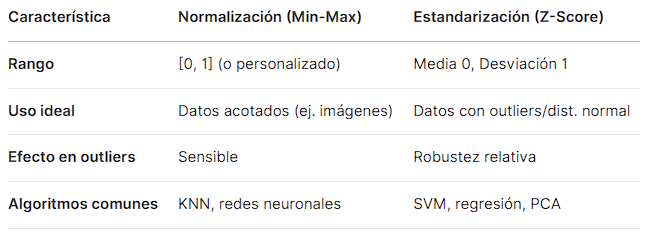

### **Normalización (Escalado Min-Max)**

Transforma los valores de una variable para que caigan en un rango específico, generalmente [0, 1].

Es útil cuando se necesitan rangos fijos y datos sin valores atípicos.

**Fórmula:**

>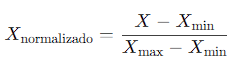

**¿Para qué se usa?**

*  Algoritmos sensibles a escalas.
*  Cuando la distribución no es normal (ej. imágenes, donde los píxeles deben estar en [0, 1] o [0, 255]).

**¿Cuándo usarla?**

*  Cuando se conocen los límites máximos y mínimos de lus datos.
*  Si se necesita que todos las características (variables) tengan el mismo peso.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# df_normalizado = scaler.fit_transform(df[['columna']])

In [ ]:
# Datos de ejemplo
data = {'edad': [20, 30, 40, 50], 'ingresos': [10000, 50000, 80000, 100000]}
df_ej = pd.DataFrame(data)
df_ej

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(7, 3))

# Gráfico 1:
axes[0].hist(df_ej['edad'], bins=10, alpha=0.7, color='purple')
axes[0].set_title('Edad')
axes[0].set_xlabel('Edad')
axes[0].set_ylabel('Frecuencia')

# Gráfico 2:
axes[1].hist(df_ej['ingresos'], bins=10, alpha=0.7, color='green')
axes[1].set_title('Ingresos')
axes[1].set_xlabel('Ingresos')
axes[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [ ]:
# Normalización
df_normalizado = pd.DataFrame(MinMaxScaler().fit_transform(df_ej), columns=df_ej.columns)
df_normalizado

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(7, 3))

# Gráfico 1:
axes[0].hist(df_normalizado['edad'], bins=10, alpha=0.7, color='purple')
axes[0].set_title('Edad')
axes[0].set_xlabel('Edad')
axes[0].set_ylabel('Frecuencia')

# Gráfico 2:
axes[1].hist(df_normalizado['ingresos'], bins=10, alpha=0.7, color='green')
axes[1].set_title('Ingresos')
axes[1].set_xlabel('Ingresos')
axes[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

### **Estandarización (Escalado Z-Score)**

Transforma los datos para que tengan media = 0 y desviación estándar = 1.

Es útil para modelos estadísticos y datos con distribución normal.

**Fórmula:**

>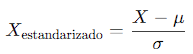

donde μ es la media y σ la desviación estándar.

**¿Para qué se usa?**
*  Algoritmos que asumen distribución normal.
*  Cuando hay outliers (es más robusta que la normalización).

**¿Cuándo usarla?**

*  Cuando no se conocen los límites de los datos.
*  Si los datos siguen (o se aproximan a) una distribución normal.

In [ ]:
from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# df_estandarizado = scaler.fit_transform(df[['columna']])

In [ ]:
# Datos de ejemplo
data = {'edad': [20, 30, 40, 50], 'ingresos': [10000, 50000, 80000, 100000]}
df_ej = pd.DataFrame(data)
df_ej

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(7, 3))

# Gráfico 1:
axes[0].hist(df_ej['edad'], bins=10, alpha=0.7, color='purple')
axes[0].set_title('Edad')
axes[0].set_xlabel('Edad')
axes[0].set_ylabel('Frecuencia')

# Gráfico 2:
axes[1].hist(df_ej['ingresos'], bins=10, alpha=0.7, color='green')
axes[1].set_title('Ingresos')
axes[1].set_xlabel('Ingresos')
axes[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [ ]:
# Estandarización
df_estandarizado = pd.DataFrame(StandardScaler().fit_transform(df_ej), columns=df_ej.columns)
df_estandarizado

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(7, 3))

# Gráfico 1:
axes[0].hist(df_estandarizado['edad'], bins=10, alpha=0.7, color='purple')
axes[0].set_title('Edad')
axes[0].set_xlabel('Edad')
axes[0].set_ylabel('Frecuencia')

# Gráfico 2:
axes[1].hist(df_estandarizado['ingresos'], bins=10, alpha=0.7, color='green')
axes[1].set_title('Ingresos')
axes[1].set_xlabel('Ingresos')
axes[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

La **Densidad de Probabilidad** es un concepto fundamental en estadística que describe cómo se distribuye la probabilidad en una variable continua.

A diferencia de las variables discretas donde probabilidades se asignan a valores específicos, en variables continuas se usan funciones de densidad de probabilidad (PDF, Probability Density Function).

**Definición:**

La PDF describe la densidad de probabilidad en un punto x.
*  No es una probabilidad directa, sino una medida de intensidad de probabilidad alrededor de x.
*  La probabilidad real se calcula como el área bajo la curva en un intervalo (integral).

**Fórmula (Distribución Normal):**

>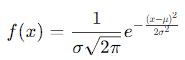

*  μ: Media (centro de la distribución).
*  σ: Desviación estándar ("ancho" de la campana).


**Interpretación**

**a. Valores altos vs. bajos**

*  Picos altos, cerca de μ en una normal: Indican zonas donde es más probable encontrar valores de la variable.
*  Colas bajas (x = μ ± 3σ): Zonas con baja densidad, eventos raros, muy improbables.

**b. Probabilidad en intervalos**

La probabilidad entre a y b es el área bajo la curva:

>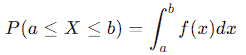

**c.** Si el contorno del histograma sigue aproximadamente la línea roja, los datos se ajustan bien a una normal.

**d.** Desviaciones sistemáticas indican que los datos podrían seguir otra distribución.

**Interpretación Visual:**

*  La altura (y) muestra densidad relativa (no probabilidad directa).
*  El área sombreada bajo la curva da la probabilidad del intervalo.

In [ ]:
from scipy.stats import norm

mu = df['Promedio Calificaciones Acumulativo'].mean()
sigma = df['Promedio Calificaciones Acumulativo'].std()

Q1 = df['Promedio Calificaciones Acumulativo'].quantile(0.25)
Q3 = df['Promedio Calificaciones Acumulativo'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

plt.figure(figsize=(10, 6))

# Histograma
plt.hist(df['Promedio Calificaciones Acumulativo'],
         bins=10,
         density=True, # Distribución empírica
         alpha=0.6,
         color='g',
         label='Datos')

# density=True: Transforma el histograma de contar frecuencias absolutas a mostrar
# densidad de probabilidad
# Ajusta las alturas de las barras para que:
# * El área total del histograma sume 1 (probabilidad total)
# * Las alturas representen densidad relativa (no conteos absolutos)

# Curva teórica normal

# Crea un array de 1000 números espaciados uniformemente entre (mu - 4*sigma) y (mu + 4*sigma)
# Se usa para crear un rango de valores en el eje x cuando se quiere graficar una distribución normal
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)

# Calcula la función de densidad de probabilidad (PDF) de una distribución normal para los valores en x
# Para obtener los valores y de la campana de Gauss en un conjunto de puntos x
y = norm.pdf(x, mu, sigma) # mu: Media (μ) de la distribución normal, sigma: Desviación estándar (σ) de la distribución normal

# Distribución teórica:
plt.plot(x, y, 'r-', linewidth=2, label=f'Dist. Normal (PDF)')

# Líneas de referencia

# Dibuja una línea vertical en una gráfica en la posición del primer parámetro.
plt.axvline(mu, color='k', linestyle='--', label=f'Media (μ={mu:.2f})')
plt.annotate(f'μ={mu:.2f}',
             xy=(mu, 0),
             xytext=(mu, -0.05),
             ha='center', va='top', color='b',
             arrowprops=dict(arrowstyle='->', color='b'))

plt.axvline(mu + sigma, color='b', linestyle=':', label=f'±σ({sigma:.2f}) = ({mu-sigma:.2f},{mu+sigma:.2f})')
plt.annotate(f'μ+σ={mu + sigma:.2f}',
             xy=(mu + sigma, 0),
             xytext=(mu + sigma, -0.05),
             ha='center', va='top', color='b',
             arrowprops=dict(arrowstyle='->', color='b'))

plt.axvline(mu - sigma, color='b', linestyle=':')
plt.annotate(f'μ-σ={mu - sigma:.2f}',
             xy=(mu - sigma, 0),
             xytext=(mu - sigma, -0.05),
             ha='center', va='top', color='b',
             arrowprops=dict(arrowstyle='->', color='b'))

plt.title('Datos vs Distribución Normal')
plt.xlabel('Promedio Calificaciones Acumulativo')
plt.ylabel('Densidad de Probabilidad')
#plt.xlim(limite_inferior, limite_superior)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Para conocer la probabilidad de que un valor de X esté en cierto rango de los datos
# P(X ≤ 7)
prob = norm.cdf(7, loc=mu, scale=sigma)
print(f"P(X ≤ 7) = {prob:.2%}")

In [ ]:
# P(-1 ≤ X ≤ 1)
prob = norm.cdf(1, mu, sigma) - norm.cdf(-1, mu, sigma)
print(f"P(-1 ≤ X ≤ 1) = {prob:.4%}")

# **Guardar Dataframe Preparado**

Se almacenan los datos preparados (limpios y con las transformaciones necesarias para el análisis que se requiere).

Como el índice del dataframe a guardar es el autonumérico que se genera automáticamente, al guardar colocamos el atributo `index=False` para que no lleve ese index como datos basura, ya que al cargar el archivo de nuevo, se generará este mismo index automáticamente.

In [ ]:
# Escritura del archivo .csv

ruta_csv = '/content/drive/MyDrive/...'

os.makedirs(ruta_csv, exist_ok=True)    # Crear carpeta si no existe

# Guardar el CSV en Google Drive
ruta_csv = os.path.join(ruta_csv, 'Dataset Preparado.csv')

try:
  df.to_csv(ruta_csv, index=False)
except OSError as err:
  print(f"No se pudo abrir el archivo. Error: {err}.")
else:
  print(f"Archivo guardado con éxito en: {ruta_csv}")



---

